In [1]:
import cv2
import numpy as np

from sklearn.metrics import pairwise

In [2]:
background = None

accumulated_weight = 0.5

roi_top = 20
roi_bottom = 300
roi_right = 300
roi_left = 600

In [3]:
def calc_accum_avg(frame, accumulated_weight ):
    
    global background
    
    if background == None:
        background = frame.copy().astype("float")
        return None

    cv2.accumulated_weight(frame,background,accumulated_weight)

In [4]:
def segment(frame,threshold = 25):
    
    global background
    
    diff = cv2.absdiff(background.astyp("uint8"), frame)
    
    _,thresholded = cv2.threshold(diff,threshold,255,cv2.THRESH_BINARY)
    
    image, contours, heirarchy = cv2.findContours(thresholded.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) == 0:
        return None
    else:
        
        hand_segemnt = max(contours, key=cv2.contourArea)
        
        return(threshold, hand_segemnt)

    

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
img1 = cv2.imread('test_dog.jpg')

In [15]:
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

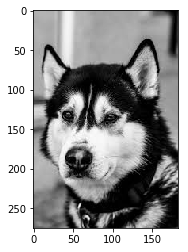

In [16]:
plt.imshow(img1,cmap="gray")

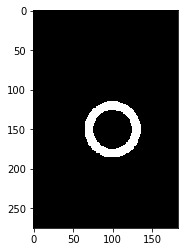

In [19]:
img =  np.zeros(img1.shape[:2],dtype="uint8")
cv2.circle(img,(100,150),30,255,10)
plt.imshow(img,cmap="gray")

In [20]:
img = cv2.bitwise_and(img1,img1,mask=img)

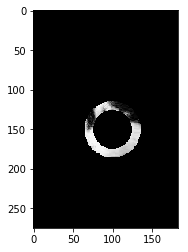

In [21]:
plt.imshow(img,cmap="gray")

In [22]:
image, contours, hierarchy = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [23]:
contours[0].shape

(202, 1, 2)

In [31]:
 x = cv2.drawContours(img,contours,0,255,1)

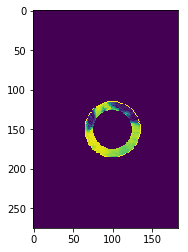

In [32]:
plt.imshow(x)

In [35]:
len(contours)

1